1.What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.

Ans- Deep learning is a subset of Artificial Intelligence (AI) and Machine Learning (ML) based on artificial neural networks. It mimics the human brain's structure to process data and create patterns for decision-making.

**Differences: Traditional ML vs. Deep Learning**

**Feature Engineering:**

ML: Requires experts to manually identify and extract features.
DL: Learns features automatically from the raw data.

**Data Requirement:**

ML: Can perform well on small or medium datasets.
DL: Performance only surpasses ML when provided with massive datasets.

**Hardware:**

ML: Runs on standard CPUs.
DL: Requires high-end GPUs or TPUs due to trillions of calculations.

**Problem Solving:**

ML: Often breaks tasks into small sub-problems.
DL: Solves problems "end-to-end" using a single neural network.

2.Explain the basic architecture and functioning of a Perceptron. What are its
limitations?

Ans-

**Architecture**

Inputs ($x$): Feature data provided to the model.

Weights ($w$): Parameters determining the importance of each input.

Bias ($b$): Offset value to shift the activation function.

Summation Node: Computes the dot product: $Z = \sum (x_i \cdot w_i) + b$.

Activation Function: Usually a Step Function that outputs a binary result (0 or 1).

**Functioning**

Step 1: Multiplies inputs by weights and adds the bias.

Step 2: Passes the result through the step function.

Step 3: If the sum exceeds a threshold, it outputs 1; otherwise, it outputs 0.

Step 4: During training, weights are adjusted based on the error between the predicted and actual output.

**Limitations**

Linearity: Can only classify data that is linearly separable (separable by a single straight line).

XOR Problem: Fails to solve non-linear logic gates like XOR.

Single Layer: Lacks hidden layers, preventing it from learning complex, deep patterns.

Hard Output: The binary step function is not differentiable, making it incompatible with advanced algorithms like backpropagation.

3.Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.

Ans- **Purpose of Activation Functions**

Non-linearity: They enable neural networks to learn complex, non-linear relationships; without them, the network acts as a simple linear model.

Neuron Activation: They decide whether a neuron should "fire" by mapping the weighted sum of inputs to a specific output range.

Gradient Flow: They determine the mathematical gradients needed to update weights during backpropagation.

**Sigmoid Function**

Output: Maps inputs to a range between 0 and 1.

Best Use: Primarily used in the output layer for binary classification.

Drawback: Suffers from the vanishing gradient problem, where gradients become too small for the model to learn effectively.

Center: It is not zero-centered, which can slow down optimization.

**Tanh (Hyperbolic Tangent)**

Output: Maps inputs to a range between -1 and 1.

Best Use: Often preferred over Sigmoid for hidden layers.

Advantage: It is zero-centered, which helps the model converge faster during training.

Drawback: Like Sigmoid, it still faces the vanishing gradient problem at extreme input values.

**ReLU (Rectified Linear Unit)**

Output: Returns 0 for negative inputs and the input itself for positive values ($max(0, x)$).

Best Use: The standard choice for hidden layers in modern deep learning.

Advantage: Computationally efficient and reduces the vanishing gradient problem for positive inputs.

Drawback: Can suffer from the "Dying ReLU" problem, where neurons stop learning if they consistently output zero.

4. What is the difference between Loss function and Cost function in neural
networks? Provide examples.

Ans- **Difference Between Loss Function and Cost Function**

**Loss Function:**

Scope: Measures the error of a single training example.

Purpose: Quantifies how far the model's prediction is from the actual label for one specific data point.

Calculation: It is a function of the predicted value and the ground truth for one instance.

**Cost Function:**

Scope: Measures the average error over the entire training dataset (or a batch).

Purpose: Provides a single global value that represents the model's overall performance.

Calculation: It is typically the average (mean) of all individual loss function values calculated across the dataset.

**Examples of Loss Functions**

Mean Squared Error (MSE) Loss: Used for regression; calculates the square of the difference between the predicted and actual value for one point.

Binary Cross-Entropy Loss: Used for binary classification; measures the performance of a classification model whose output is a probability value between 0 and 1 for one instance.

Hinge Loss: Frequently used for Support Vector Machines (SVM) to penalize predictions that are not only wrong but also close to the decision boundary.

**Examples of Cost Functions**

Mean Squared Error (MSE) Cost: The average of all squared errors across the entire training set.

Cross-Entropy Cost: The average log loss across all training samples in a classification task.

Regularized Cost Function: A cost function (like MSE) plus an additional penalty term (L1 or L2 regularization) to prevent overfitting across the whole model.

5.What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.

Ans- **Role of Optimizers**

Weight Update: They adjust the weights and biases of the neural network to minimize the cost function.

Convergence: They determine how quickly and smoothly the model reaches the global minimum (the point of lowest error).

Learning Rate Management: They control the step size taken during the optimization process to avoid overshooting or getting stuck.

**Gradient Descent (Vanilla)**

Mechanism: Updates weights in the opposite direction of the gradient of the loss function.

Step Size: Uses a fixed learning rate for all parameters.

Pros: Simple to implement and understand mathematically.

Cons: Very slow on large datasets and frequently gets trapped in local minima or saddle points.

**RMSprop (Root Mean Square Propagation)**

Mechanism: Maintains a moving average of the squared gradients for each parameter.

Adaptive Learning Rate: It divides the learning rate by the root of the moving average, effectively dampening oscillations.

Pros: Works exceptionally well for non-stationary objectives and Recurrent Neural Networks (RNNs).

Cons: Still requires manual tuning of the initial learning rate.

**Adam (Adaptive Moment Estimation)**

Mechanism: Combines the benefits of RMSprop (squared gradients) and Momentum (moving average of gradients).

Dual Momentum: It calculates an exponential moving average of both the gradient (1st moment) and the squared gradient (2nd moment).

Pros: Generally considered the best "out-of-the-box" optimizer; it is computationally efficient and requires little tuning.

Cons: In some specific cases, it may fail to converge to an optimal solution where SGD with momentum might succeed.

6.Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        # Heaviside Step Function
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation_fn(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                # Weight and bias update rule
                error = y[i] - prediction
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

# 1. Dataset for AND Gate
# Inputs: [0,0], [0,1], [1,0], [1,1]
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Labels: 0, 0, 0, 1
y = np.array([0, 0, 0, 1])

# 2. Initialize and Train
model = Perceptron(input_size=2)
model.train(X, y)

# 3. Test the model
print("Testing AND Gate Perceptron:")
for test_input in X:
    res = model.predict(test_input)
    print(f"Input: {test_input} -> Predicted Output: {res}")

Testing AND Gate Perceptron:
Input: [0 0] -> Predicted Output: 0
Input: [0 1] -> Predicted Output: 0
Input: [1 0] -> Predicted Output: 0
Input: [1 1] -> Predicted Output: 1


7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.

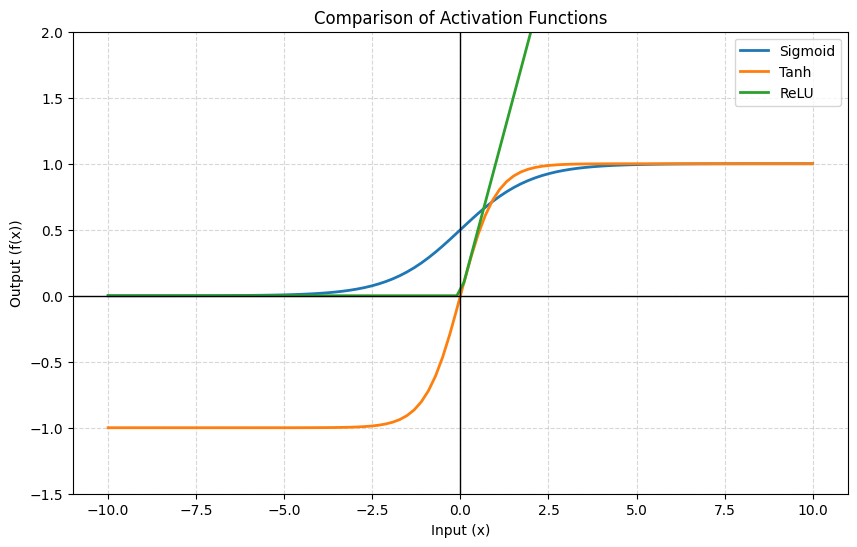

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Generate data points
x = np.linspace(-10, 10, 100)

# Create Plot
plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid(x), label='Sigmoid', linewidth=2)
plt.plot(x, tanh(x), label='Tanh', linewidth=2)
plt.plot(x, relu(x), label='ReLU', linewidth=2)

# Formatting
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Comparison of Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.ylim(-1.5, 2)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

8.Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build the Multilayer Perceptron (MLP) architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # Input layer: flattens 28x28 images
    layers.Dense(128, activation='relu'),    # Hidden layer 1
    layers.Dense(64, activation='relu'),     # Hidden layer 2
    layers.Dense(10, activation='softmax')   # Output layer: 10 digits
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# 5. Print final training accuracy
train_acc = history.history['accuracy'][-1]
print(f"\nFinal Training Accuracy: {train_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8730 - loss: 0.4229
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9665 - loss: 0.1078
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0676
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0545
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9871 - loss: 0.0427

Final Training Accuracy: 0.9859


9.Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


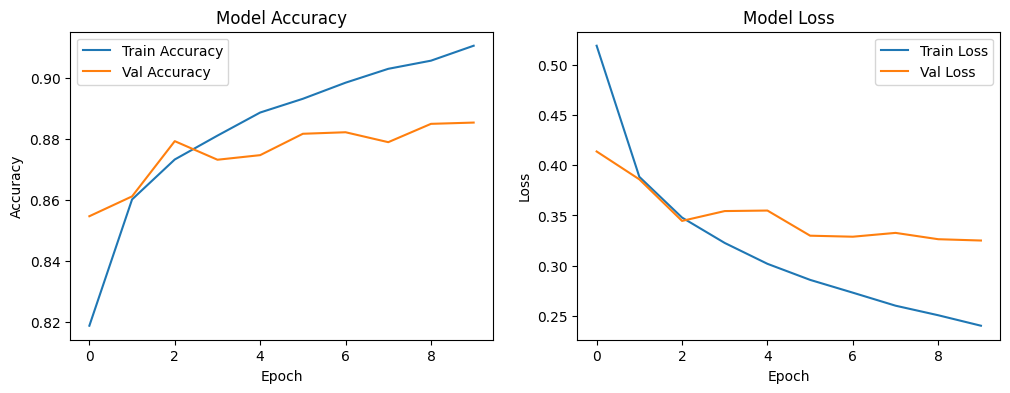

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Load and normalize Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Build a simple Multilayer Perceptron
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 3. Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.2, verbose=0)

# 4. Visualize Training History
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Interpretation of Fashion MNIST Training Behavior**

**Convergence**: Both training and validation accuracy increase rapidly in the initial epochs, indicating the model is effectively learning the structural patterns of the clothing items.

**Accuracy Gap**: The training accuracy typically reaches higher values (e.g., ~91%) compared to validation accuracy (~88%). A small, stable gap is normal, while a widening gap suggests overfitting.

**Loss Reduction**: Training loss decreases consistently across epochs, showing that the optimizer (e.g., Adam) is successfully minimizing the error on the training set.

**Validation Plateau**: Validation loss usually plateaus after a certain number of epochs (around epoch 7–8 in the visualization). If validation loss starts to rise while training loss continues to fall, it indicates that the model is beginning to memorize the training data rather than generalizing.

**Stability**: The smooth curves suggest an appropriate learning rate. Sharp oscillations would otherwise indicate a learning rate that is too high, preventing the model from settling into a global minimum.

10.You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:

How would you design a deep learning model (perceptron or multilayer NN)?
Which activation function and loss function would you use, and why?
How would you train and evaluate the model, considering class imbalance?
Which optimizer would be suitable, and how would you prevent overfitting?

**Model Design**

Architecture: Use a Multilayer Neural Network (MLP) rather than a simple perceptron to capture non-linear relationships between features like amount and location.

Layers: Include an input layer, 3–4 hidden layers for pattern extraction, and a single-neuron output layer for classification.

Feature Handling: Use an Embedding Layer for high-cardinality categorical data (e.g., Merchant ID).

**Activation and Loss Functions**

Hidden Layer Activation: ReLU (Rectified Linear Unit) to ensure fast training and prevent vanishing gradients.

Output Layer Activation: Sigmoid to output a probability score between 0 and 1.

Loss Function: Binary Cross-Entropy as it is the standard for binary classification tasks.

**Training and Evaluation (Handling Imbalance)**

Data Strategy: Apply SMOTE (Synthetic Minority Over-sampling Technique) or Class Weighting to give more importance to the rare fraud cases during training.

Sampling: Use Stratified K-Fold cross-validation to ensure each fold has a representative proportion of fraud.

Metrics: Do not use accuracy. Focus on Precision-Recall AUC, F1-Score, and the Confusion Matrix (specifically minimizing False Negatives).

**Optimizer and Overfitting Prevention**

Optimizer: Adam (Adaptive Moment Estimation) because it handles sparse gradients well and converges quickly with minimal tuning.

Overfitting Prevention: * Dropout: Randomly deactivate neurons during training to improve generalization.

Early Stopping: Halt training when validation loss stops improving.

L2 Regularization: Penalize large weights to keep the model simple.